In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [ ]:
def show_genres(df: pl.DataFrame):
    unique_genres = (
        df
        .select(
            pl.col("genre")
            .str.split(",")         # split strings by comma into list
            .arr.explode()          # explode list into rows
            .str.strip_chars()      # strip spaces
        )
        .unique()
        .drop_nulls()
        .sort("genre")
        .to_series()
        .to_list()
    )
    print(unique_genres)

def show_genres(df):
    unique_genres = sorted(
    set(
        genre.strip()
        for genre_list in df['genre']
        for genre in genre_list.split(',')
        if genre.strip()
        )
    )
    print(unique_genres)

def show_top_genres(df: pl.DataFrame, top_n: int = 20):
    class_counts = (
        df.group_by("genre")
        .count()
        .sort("count", descending=True)
        .head(top_n)
    )
    class_counts_pd = class_counts.to_pandas()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=class_counts_pd["count"], y=class_counts_pd["genre"], palette="viridis")
    plt.title("Top Genres by Number of Samples")
    plt.xlabel("Number of Samples")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()


def show_top_genres_singly(df: pl.DataFrame, top_n: int = 20):
    exploded = (
        df.select(pl.col("genre"))
        .with_columns(
            pl.col("genre")
            .str.split(",")
            .arr.explode()
            .str.strip_chars()
            .alias("genre")
        )
    )
    genre_counts = (
        exploded.group_by("genre")
        .count()
        .sort("count", descending=True)
        .head(top_n)
    )
    genre_counts_pd = genre_counts.to_pandas()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=genre_counts_pd["count"], y=genre_counts_pd["genre"], palette="viridis")
    plt.title("Top Genres (singly) by Number of Samples")
    plt.xlabel("Number of Samples")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()


In [4]:
df = pl.read_csv('../merged_genre_lyrics.csv')

df

genre,lyrics
str,str
"""soul,electropop,hip hop""","""[Verse 1] This shit remind me …"
"""pop; dance""","""I was looking lost, it was col…"
"""rock""","""[Текст песни Искал тебя] [Куп…"
"""pop""","""No use of talkin' no use of ta…"
"""pop""","""I can still hear your voice in…"
…,…
"""pop""","""[Intro] Flashback to 2020, thi…"
"""misc""","""Second Joint Debate, At Freepo…"
"""folk""","""[Verse] There are so many thin…"


In [16]:
genre_counts = (
    df
    .with_columns(
        pl.col("genre").str.split(",")       
    )
    .explode("genre")                        
    .with_columns(
        pl.col("genre").str.strip_chars()    
    )
    .group_by("genre")                       
    .count()
    .sort("count", descending=True)
)

print(genre_counts)

shape: (1_860, 2)
┌─────────────────────────────────┬─────────┐
│ genre                           ┆ count   │
│ ---                             ┆ ---     │
│ str                             ┆ u32     │
╞═════════════════════════════════╪═════════╡
│ pop                             ┆ 1530390 │
│ rap                             ┆ 1089613 │
│ rock                            ┆ 840504  │
│ hip-hop                         ┆ 215807  │
│ rb                              ┆ 159583  │
│ …                               ┆ …       │
│ hip hop; pop; instrumental      ┆ 1       │
│ salsa                           ┆ 1       │
│ pop/rock; classic rock; gospel… ┆ 1       │
│ funk carioca; blues             ┆ 1       │
│ funk; trap; rap                 ┆ 1       │
└─────────────────────────────────┴─────────┘


/tmp/ipykernel_1522902/1791240763.py:11: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


/tmp/ipykernel_1522902/2968818385.py:18: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()
/tmp/ipykernel_1522902/2968818385.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_pd["count"], y=class_counts_pd["genre"], palette="viridis")


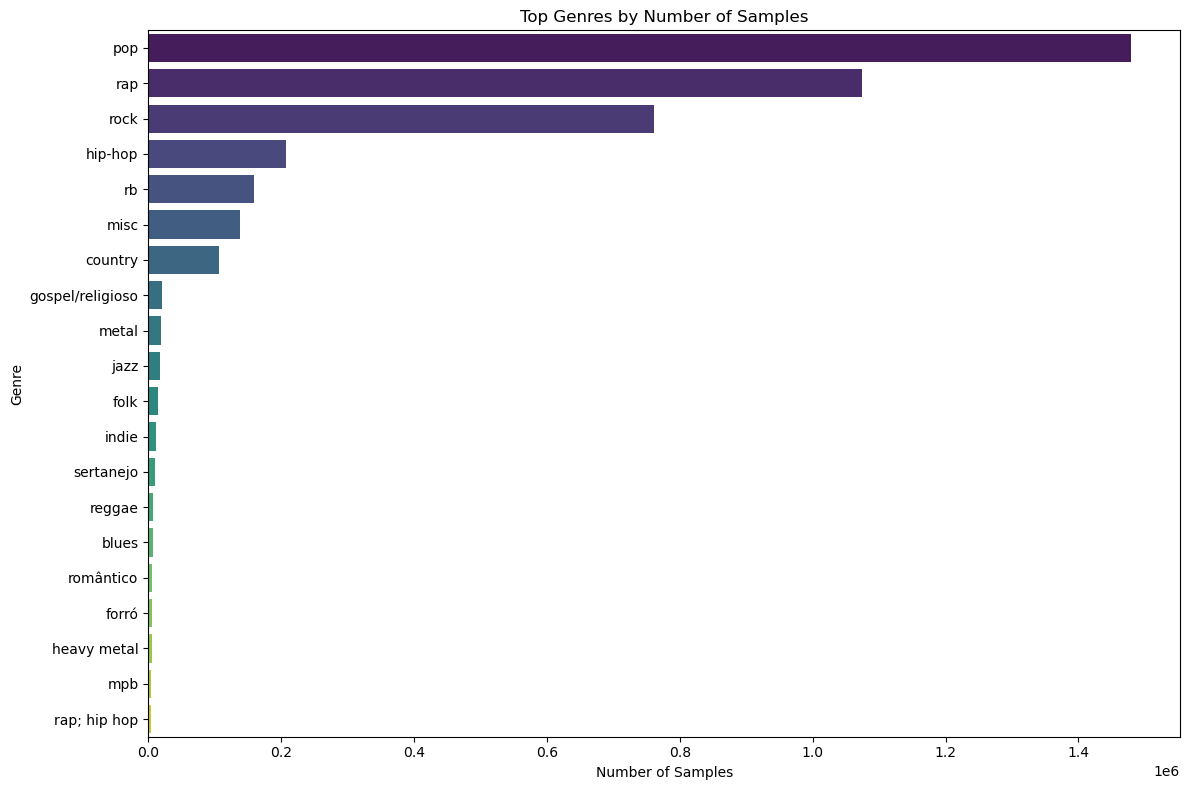

In [18]:
show_top_genres(df)

In [25]:
df = df.with_columns(
    pl.col("genre").str.replace_all(r"[;/:\|]", ",")
)

# Strip leading/trailing whitespace
df = df.with_columns(
    pl.col("genre").str.strip_chars()
)

# Remove spaces after commas
df = df.with_columns(
    pl.col("genre").str.replace_all(r",\s*", ",")
)
genre_counts = (
    df
    .group_by("genre")
    .count()
    .sort("count", descending=True)
)

# Show sorted list of genres
genre_list = genre_counts["genre"].to_list()
print(genre_list)

['pop', 'rap', 'rock', 'hip-hop', 'rb', 'misc', 'country', 'gospel,religioso', 'metal', 'jazz', 'folk', 'indie', 'sertanejo', 'rap,hip hop', 'reggae', 'blues', 'romântico', 'forró', 'heavy metal', 'mpb', 'electronic', 'soul', 'r&b', 'sertanejo,romântico', 'rock,pop,alternative rock', 'j-pop,j-rock', 'samba', 'hip hop,rap', 'hip hop,trap', 'mpb,romântico', 'rap,hip hop,trap', 'rock,heavy metal,metal', 'trap', 'hip hop,rap,black music', 'rock,alternative rock,indie rock', 'pop,rock', 'indie rock', 'rock,alternative rock,punk', 'rock,hard rock,heavy metal', 'rap,hip-hop,hip hop', 'funk carioca', 'punk rock', 'indie pop', 'romântico,sertanejo,country', 'heavy metal,rock,hard rock', 'punk', 'trap,hip hop', 'sertanejo,romântico,country', 'velha guarda', 'hip-hop,hip hop', 'axé', 'rap,hip hop,black music', 'rock,electronic,synthpop', 'classical', 'heavy metal,hard rock,rock', 'indie,rock', 'rock,electronic,alternative rock', 'rock,trance,electronic', 'soul music,r&b', 'pop,rock,rock', 'rock,p

/tmp/ipykernel_1522902/3980296464.py:17: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


In [35]:
def remove_leading_dashes(s: str) -> str:
    genres = s.split(',')
    cleaned = [genre.lstrip('- ').strip() for genre in genres if genre.strip()]
    return ','.join(cleaned)

df = df.with_columns(
    pl.Series([remove_leading_dashes(x) for x in df['genre']]).alias('genre')
)

genre_counts = (
    df.group_by('genre') 
      .agg(pl.count().alias('count'))
      .sort('count', descending=True)  
)
genres_list = genre_counts['genre'].to_list()
genres_list

/tmp/ipykernel_1522902/590254148.py:12: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias('count'))


['pop',
 'rap',
 'rock',
 'hip-hop',
 'rb',
 'misc',
 'country',
 'gospel,religioso',
 'metal',
 'jazz',
 'folk',
 'indie',
 'sertanejo',
 'rap,hip hop',
 'reggae',
 'blues',
 'romântico',
 'forró',
 'heavy metal',
 'mpb',
 'electronic',
 'soul',
 'r&b',
 'sertanejo,romântico',
 'rock,pop,alternative rock',
 'j-pop,j-rock',
 'samba',
 'hip hop,rap',
 'hip hop,trap',
 'mpb,romântico',
 'rap,hip hop,trap',
 'rock,heavy metal,metal',
 'trap',
 'hip hop,rap,black music',
 'rock,alternative rock,indie rock',
 'pop,rock',
 'indie rock',
 'rock,alternative rock,punk',
 'rock,hard rock,heavy metal',
 'rap,hip-hop,hip hop',
 'funk carioca',
 'punk rock',
 'indie pop',
 'romântico,sertanejo,country',
 'heavy metal,rock,hard rock',
 'punk',
 'trap,hip hop',
 'sertanejo,romântico,country',
 'velha guarda',
 'hip-hop,hip hop',
 'axé',
 'rap,hip hop,black music',
 'rock,electronic,synthpop',
 'classical',
 'heavy metal,hard rock,rock',
 'indie,rock',
 'rock,electronic,alternative rock',
 'rock,tranc

In [53]:
df["genre"]

genre
str
"""soul,electropop,hip hop"""
"""pop,dance"""
"""rock"""
"""pop"""
"""pop"""
…
"""pop"""
"""misc"""
"""folk"""


In [56]:
show_genres(df)

InvalidOperationError: expected Array type, got: list[str]